In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df_tecnologias = pd.read_csv(r'dataset_processed\Provincia_tec_habil_prces')

In [15]:
df_tecnologias.columns

Index(['Provincia', 'Localidad', 'ADSL', 'CABLEMODEM', 'DIALUP', 'FIBRAOPTICA',
       '4G', '3G', 'TELEFONIAFIJA', 'WIRELESS', 'SATELITAL'],
      dtype='object')

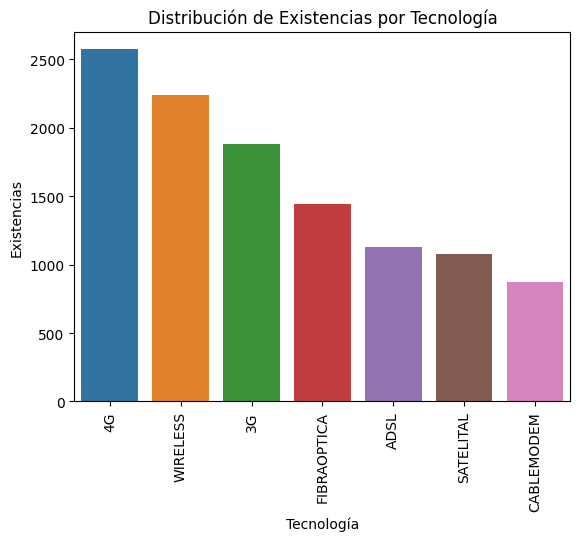

In [16]:
# Quitamos Diaup y Telefoniafija por ser tecnologias casi o en deshuso
tecnologias = df_tecnologias[['ADSL', 'CABLEMODEM', 'FIBRAOPTICA', '4G', '3G', 'WIRELESS', 'SATELITAL']].columns
existencias = df_tecnologias[['ADSL', 'CABLEMODEM', 'FIBRAOPTICA', '4G', '3G', 'WIRELESS', 'SATELITAL']].sum()

# Ordenar las existencias de mayor a menor
existencias_sorted = existencias.sort_values(ascending=False)

sns.barplot(x=existencias_sorted.index, y=existencias_sorted)
plt.title('Distribución de Existencias por Tecnología')
plt.xlabel('Tecnología')
plt.ylabel('Existencias')
plt.xticks(rotation=90)
plt.show()

Podemos apreciar que una de las tecnologias que mas predomina es la movil, con el 4G y el 3G (Wireless tambien podria ser considerada parte ya que solo se refiere a cualquier aparato que produzca señal inalambrica).

C:\Users\Alan\AppData\Local\Temp\ipykernel_4636\2515520176.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  existencias_por_provincia['Suma_Total'] = existencias_por_provincia.sum(axis=1)


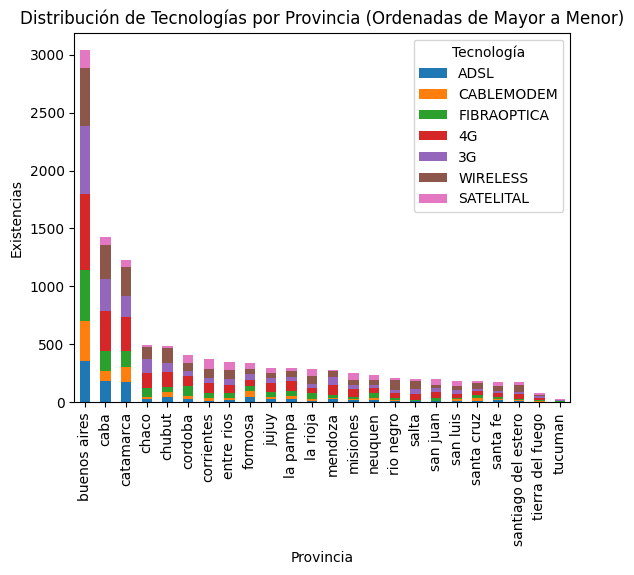

In [17]:
tecnologias = ['ADSL', 'CABLEMODEM', 'FIBRAOPTICA', '4G', '3G', 'WIRELESS', 'SATELITAL']
existencias_por_provincia = df_tecnologias[tecnologias]

# Calcular la suma de existencias por provincia
existencias_por_provincia['Suma_Total'] = existencias_por_provincia.sum(axis=1)

# Ordenar el DataFrame por la suma total de existencias en cada provincia
existencias_por_provincia = existencias_por_provincia.sort_values('Suma_Total', ascending=False)

# Obtener los nombres de las provincias como etiquetas
provincias = df_tecnologias['Provincia']  # Reemplaza 'Provincia' por el nombre de la columna de provincias en tu DataFrame

# Crear el gráfico de barras apiladas
ax = existencias_por_provincia.drop('Suma_Total', axis=1).plot(kind='bar', stacked=True)

# Personalizar el gráfico
plt.title('Distribución de Tecnologías por Provincia (Ordenadas de Mayor a Menor)')
plt.xlabel('Provincia')
plt.ylabel('Existencias')

# Establecer las etiquetas del eje x con las provincias ordenadas
ax.set_xticklabels(provincias, rotation=90)

# Mostrar el gráfico
plt.legend(title='Tecnología')
plt.show()

Luego en un apartado de distribucion por provincias podemos ver que quien tiene mayor precensia a lo largo de las 24 provincias de la Argentina es el 4G, incluso en aquellas provincias mas chicas sigue siendo la tecnologia mas habilitada para su uso.

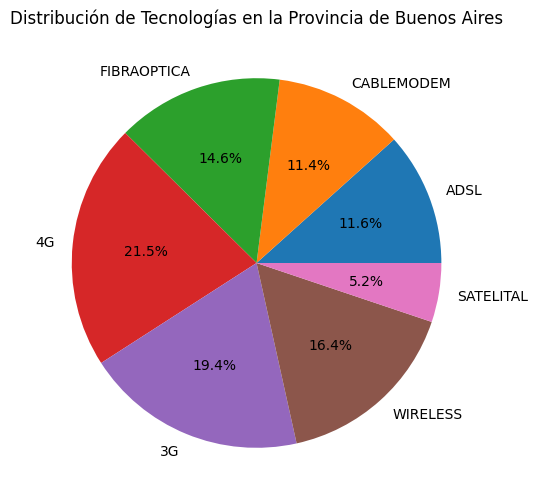

In [18]:
# Filtrar el DataFrame para obtener solo los datos de la provincia de Buenos Aires
df_buenos_aires = df_tecnologias[df_tecnologias['Provincia'] == 'buenos aires']

# Obtener los valores de las tecnologías en la provincia de Buenos Aires
valores_tecnologias = df_buenos_aires[['ADSL', 'CABLEMODEM', 'FIBRAOPTICA', '4G', '3G', 'WIRELESS', 'SATELITAL']].iloc[0]

# Etiquetas de las tecnologías
etiquetas_tecnologias = ['ADSL', 'CABLEMODEM', 'FIBRAOPTICA', '4G', '3G', 'WIRELESS', 'SATELITAL']

# Crear el gráfico de torta
plt.figure(figsize=(8, 6))
plt.pie(valores_tecnologias, labels=etiquetas_tecnologias, autopct='%1.1f%%')

# Personalizar el gráfico
plt.title('Distribución de Tecnologías en la Provincia de Buenos Aires')

# Mostrar el gráfico
plt.show()


Siendo Buenos Aires la provincia con mas existencias de la Argentina, podemos ver mas de cerca como el sector movil abarca gran parte del pastel de las telecomunicaciones.